<head>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;500;700&display=swap" rel="stylesheet">
  <style>
    body {
      background-color: #f5f5f5;
      color: #333;
      padding: 40px;
      font-family: 'Roboto', sans-serif;
      text-align: left;
    }
    .container {
      width: 600px;
      margin: 20px 0;
    }
    .icon {
      margin-right: 10px;
      vertical-align: middle;
    }
    .spacer {
      margin-top: 40px;
    }
  </style>
</head>
<body>

  <!-- Title Section -->
  <div class="container">
    <h1 style="margin: 0; font-size: 36px; letter-spacing: 1.5px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/brain.png" width="40" class="icon">Neural Network From Scratch
    </h1>
  </div>

  <!-- University Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/university.png" width="30" class="icon">University
    </h2><br>
    <div style="display: flex; align-items: center;">
      <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width="60px" style="margin-right: 10px;">
      <span style="font-size: 18px;">University of Tehran</span>
    </div>
  </div>

  <!-- Student Info Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/student-male.png" width="30" class="icon">Student Info
    </h2>
    <span style="font-size: 18px;">Name : Amirhossein</span><br>
    <span style="font-size: 18px;">Last Name : Arefzadeh</span><br>
    <span style="font-size: 18px;">SID : 810101604</span>
  </div>

  <!-- Description Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/info.png" width="30" class="icon">Project Overview
    </h2>
    <p style="font-size: 18px; line-height: 1.6;">
    The project involves implementing a neural network from scratch, focusing on fundamental layers and their behaviors during forward and backward propagation. The network includes fully connected layers, activation functions such as ReLU and Sigmoid, and loss functions like Softmax and Mean Squared Error (MSE). Each layer is designed to handle parameter updates through gradient descent, with the goal of performing both classification and regression tasks. The components were tested individually before being integrated into a complete feedforward network, ensuring correctness by comparing numerical gradients.
    </p>
  </div>
  
</body>


## 📚 Import Required Libraries

In this section, we import the necessary libraries to enable the required functionalities and operations for the project.

In [1]:
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from utils.solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def print_mean_std(x,axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

## 🚀 Fully-Connected Neural Nets

implement fully-connected networks using a modular approach.

In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

## ⛓️ affine layers

### ⏩ Affine layer: forward
Implement the `affine_forward` function.

1. **Reshape Input (`x`)**: 

   - The input `x` is reshaped into a 2D array with shape `(N, D)`, where `D = d_1 * ... * d_k` is the product of all dimensions after the batch size.

   - This ensures that each example in the minibatch is flattened for matrix multiplication.

2. **Matrix Multiplication**:

   - Multiply the reshaped input (`x_reshaped`) with the weight matrix (`w`).

   - Add the bias vector (`b`) to compute the output `out`.

3. **Cache Storage**:

   - Store the original input (`x`), weights (`w`), and biases (`b`) in a cache for use during the backward pass.
   
   - The cache helps retain necessary variables for gradient computation during backpropagation.


In [320]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    row_dim = x.shape[0]
    col_dim = np.prod(x.shape[1:])
    x_reshape = x.reshape(row_dim, col_dim)
    out = np.dot(x_reshape, w) + b.reshape(1, -1)
    cache = (x, w, b)
    return out, cache
    

### 🧪 test affine_forward implementaion
We test Our implementaion by running the following:

In [321]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])


# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


### ⏪ Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

1. **Unpack Cache**:

   - Retrieve the original input (`x`), weights (`w`), and biases (`b`) from the cache.

2. **Reshape Input (`x` for computation)**:

   - Reshape `x` into a 2D array of shape `(N, D)` to align with the dimensions used during the forward pass.

3. **Gradient w.r.t. Weights (`dw`)**:

   - Compute the gradient of the loss with respect to the weights using the chain rule.

   - Multiply the transposed reshaped input (`x_reshaped.T`) with `dout`. The result has a shape of `(D, M)`.

4. **Gradient w.r.t. Biases (`db`)**:

   - Sum `dout` over all samples (axis 0) to compute the gradient of the biases.

   - The result has a shape of `(M,)`.

5. **Gradient w.r.t. Input (`dx`)**:

   - Compute the gradient of the loss with respect to the input using the chain rule.

   - Multiply `dout` with the transposed weights (`w.T`).

   - This gives `dx_reshaped` with a shape of `(N, D)`.

6. **Reshape `dx`**:

   - Reshape `dx_reshaped` back to the original shape of `x`, i.e., `(N, d_1, ..., d_k)` to maintain compatibility with the input dimensions for further backpropagation.


When the batch size is greater than 1, the result equals the batch gradient summed together.
<!-- 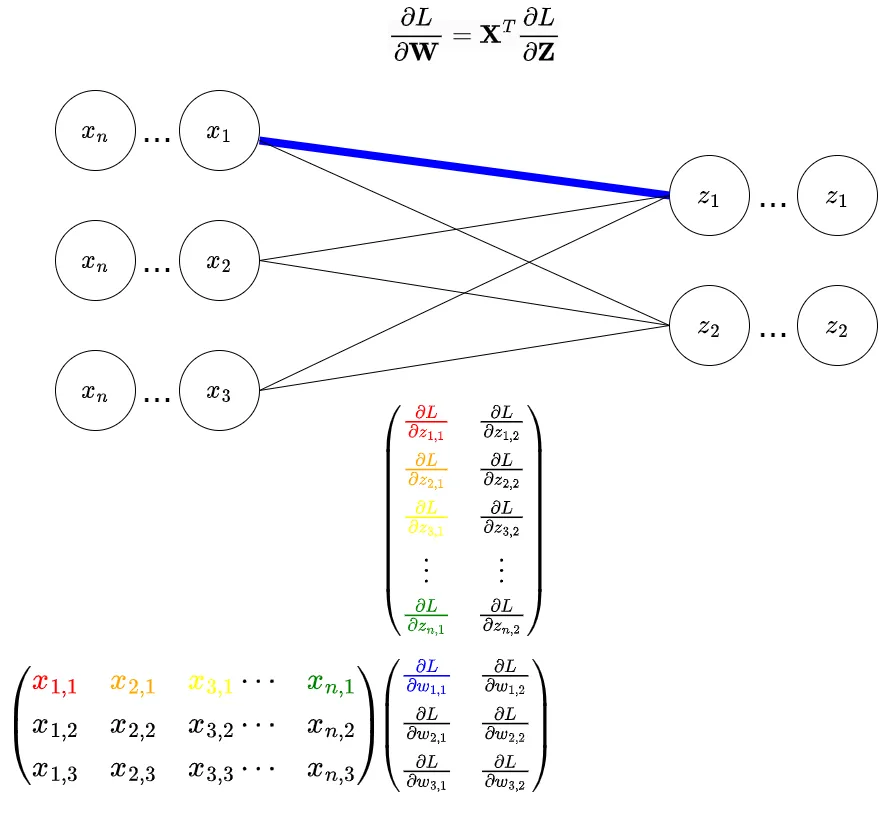 -->


In [322]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """    
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x, w, b = cache
    dx, dw, db = None, None, None
    
    row_dim = x.shape[0]
    col_dim = np.prod(x.shape[1:])
    x_reshape = x.reshape(row_dim, col_dim)

    dx_reshaped = np.dot(dout, w.T)   # Gradient of input data in shape (N, D)
    dx = dx_reshaped.reshape(x.shape) # Reshape dx to (N, d_1, ..., d_k)
    dw = np.dot(x_reshape.T, dout)    # Gradient of weights
    db = np.sum(dout, axis=0)         # Gradient of biases

    return dx,dw,db


### 🧪 test affine_backward implementaion
We test Our implementaion by running the following:

In [323]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


## 💣 activation functions

### ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.

1. **ReLU Activation**:

   - Apply the ReLU activation function element-wise to the input `x`. 

   - The ReLU function outputs `x` if `x > 0`, otherwise it outputs `0`.

   - This is implemented using `np.maximum(0, x)`.

2. **Shape Preservation**:

   - The shape of the output `out` is identical to the input `x`.

3. **Cache Storage**:

   - Store the input `x` in the cache for use during the backward pass. The cache helps retain necessary variables for gradient computation during backpropagation.


In [324]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    out = None
    out = x.copy()
    out[out <= 0 ] = 0
    cache = x
    return out, cache

### 🧪 test relu_forward implementaion
We test Our implementaion by running the following:

In [325]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


### ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function.

1. **ReLU Activation**:

   - Apply the ReLU activation function element-wise to the input `x`. 

   - The ReLU function outputs `x` if `x > 0`, otherwise it outputs `0`.

   - This is implemented using `np.maximum(0, x)`.

2. **Shape Preservation**:

   - The shape of the output `out` is identical to the input `x`.

3. **Cache Storage**:

   - Store the input `x` in the cache for use during the backward pass. The cache helps retain necessary variables for gradient computation during backpropagation.


In [326]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    dx, x = None, cache
    dx = dout.copy()
    dx[x < 0] = 0 # passed only when x > 0
    return dx

### 🧪 test relu_backward implementaion
We test Our implementaion by running the following:

In [327]:
# Test the relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


### Sigmoid activation: forward
Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.

1. **Sigmoid Activation**:

   - Apply the Sigmoid activation function element-wise to the input `x`.

   - The Sigmoid function is defined as:<br>

     $$
     \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
     $$

2. **Shape Preservation**:

   - The shape of the output `out` is identical to the input `x`.

3. **Cache Storage**:

   - Store the output `out` (i.e., `sigmoid(x)`) in the cache instead of the input for easier gradient computation during the backward pass.


In [328]:
def sigmoid_forward(x):
    """
    Computes the forward pass for a layer of Sigmoid.

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    ###########################################################################
    # TODO: Implement the Sigmoid forward pass.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    out = 1 / (1 + np.exp(-x.copy()))
    cache = x

    return out, cache

### 🧪 test sigmoid_forward implementaion
We test Our implementaion by running the following:

In [329]:
# Test the sigmoid_forward function

x = np.linspace(-6, 6, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955 , 0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045 , 0.99267486, 0.99752738]])

# Compare your output with ours. The error should be on the order of e-7
print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing sigmoid_forward function:
difference:  6.383174040859927e-07


### Sigmoid activation: backward
Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.

1. **Retrieve Cached Value**:

   - The cached value is `sigmoid(x)` from the forward pass, which is stored in the `cache`.

2. **Sigmoid Gradient**:

   - The derivative of the Sigmoid function is:
   
     $$
     \text{Sigmoid}'(x) = \text{Sigmoid}(x) \cdot (1 - \text{Sigmoid}(x))
     $$

   - Use the chain rule to compute the gradient as:

     $$
     dx = \text{dout} \cdot \text{Sigmoid}(x) \cdot (1 - \text{Sigmoid}(x))
     $$

3. **Shape Preservation**:

   - The gradient `dx` has the same shape as the input `x` (and `dout`), ensuring compatibility for backpropagation.


In [330]:
def sigmoid_backward(dout, cache):
    """
    Computes the backward pass for a layer of Sigmoid.

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    ###########################################################################
    # TODO: Implement the Sigmoid backward pass.                              #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    x = cache  
    sigmoid_x = 1 / (1 + np.exp(-x))
    dx = dout * sigmoid_x * (1 - sigmoid_x)

    return dx

### 🧪 test sigmoid_backward implementaion
we can test our implementation using numeric gradient checking:

In [331]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, cache)

# The error should be on the order of e-11
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


## 🥪 Sandwich layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity.<br>in here we Implement the forward and backward pass for the affine layer followed by a ReLU nonlinearity in the `affine_relu_forward` and `affine_relu_backward` functions. 

### Explanation for `affine_relu_forward`

1. **Affine Forward Pass**:
   - The first step is to compute the output of the affine (fully connected) layer using the `affine_forward` function.
   - The output of this step is `affine_out`, and its cache (`affine_cache`) contains the inputs, weights, and biases.

2. **ReLU Forward Pass**:
   - Apply the ReLU activation function to the output of the affine layer (`affine_out`) using the `relu_forward` function.
   - The output of this step is `out`, and its cache (`relu_cache`) stores the input to the ReLU activation for backward computations.

3. **Combine Caches**:
   - To simplify the backward pass, the caches from the affine and ReLU layers are stored together as a tuple: `(affine_cache, relu_cache)`.

4. **Output**:
   - The function returns the final output from the ReLU layer (`out`) and the combined cache (`cache`) for backpropagation.


In [332]:
def affine_relu_forward(x, w, b):
    """
    Convenience layer that performs an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    ###########################################################################
    # TODO: Implement the affine-RELU forward pass.                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    affine_out, affine_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(affine_out)

    # Combine caches for backward part
    cache = (affine_cache, relu_cache)

    return out, cache

    

### Explanation for `affine_relu_backward`

1. **Unpack Cache**:

   - Retrieve the `affine_cache` (from `affine_forward`) and `relu_cache` (from `relu_forward`) stored during the forward pass.

2. **ReLU Backward Pass**:

   - Compute the backward pass for the ReLU layer using `relu_backward`.

   - The output of this step (`drelu`) is passed upstream to the affine layer.

3. **Affine Backward Pass**:

   - Use the `affine_backward` function to compute the gradients with respect to the inputs (`dx`), weights (`dw`), and biases (`db`) of the affine layer.

4. **Output**:

   - The gradients `dx`, `dw`, and `db` are returned, ensuring compatibility with the next layers in the network.


In [333]:
def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    
    Inputs:
    - dout: Upstream derivatives, of any shape
    - cache: (fc_cache, relu_cache)
      
    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    ###########################################################################
    # TODO: Implement the affine-RELU backward pass.                          #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    affine_cache, relu_cache = cache

    drelu = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(drelu, affine_cache)

    return dx, dw, db


### 🧪 test our Sandwich
we can test our implementation using numeric gradient checking:

In [334]:
# Test the affine_relu_backward function

np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


## ⚖️ Loss Functions

### Softmax
Now we implement the loss and gradient for softmax in the `softmax_loss` function.

#### Explanation for `softmax_loss`

1. **Compute Softmax Probabilities**:

   - Compute the exponentials of the shifted logits.

   - Normalize the exponentials to compute probabilities, ensuring they sum to `1` for each sample.

2. **Loss Calculation**:

   - Compute the negative log-probabilities for the correct class using the formula:<br>

     $$
     \text{loss} = -\frac{1}{N} \sum_{i=1}^N \log(\text{probs}[i, \text{y}[i]])
     $$

   - Take the mean over all samples (`N`) to compute the final scalar loss.

3. **Gradient Calculation**:

   - The gradient (`dx`) of the softmax loss with respect to the input scores (`x`) is computed as:<br>
     $$
     \text{dx} = \text{probs}
     $$
     For the correct class, subtract `1`:
     $$
     \text{dx}[i, \text{y}[i]] -= 1
     $$

   - Divide by `N` to normalize across the batch.

4. **Output**:

   - Return the scalar loss and the gradient `dx` for further use in backpropagation.


In [335]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    ###########################################################################
    # TODO: Implement the softmax_loss function.                              #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #the first implementation:
    
    # x -= np.max(x, axis=1, keepdims=True)
    # exp_logits = np.exp(x)
    # probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # N = x.shape[0]
    # correct_logprobs = -np.log(probs[np.arange(N), y])
    # loss = np.sum(correct_logprobs) / N
    
    # dx = probs.copy()
    # dx[np.arange(N), y] -= 1
    # dx /= N

    # return loss, dx
    
    #the second implementation:
    
    numerical_stabilizer = 1e-12
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    N = x.shape[0]
    loss = -np.sum(np.log(probs[np.arange(N), y] + numerical_stabilizer)) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

#### 🧪 test softmax_loss implementaion

we can make sure that the implementations are correct by running the following:

In [336]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.3025458444907376
dx error:  9.646444434150698e-09


### MSE
Now implement the loss and gradient for mean squared error in the `mse_loss` function.

#### Explanation for `mse_loss`

1. **Loss Calculation**:

   - The Mean Squared Error (MSE) loss is defined as:

     $$
     \text{MSE} = \frac{1}{2N} \sum_{i=1}^N (x[i] - y[i])^2
     $$

   - Compute the squared differences between the predicted values (`x`) and the target values (`y`), sum them, and normalize by `2N` to calculate the scalar loss.

2. **Gradient Calculation**:

   - The gradient of the MSE loss with respect to the predicted values `x` is:

     $$
     \frac{\partial \text{MSE}}{\partial x[i]} = \frac{1}{N} (x[i] - y[i])
     $$

   - For each sample, this captures how the loss changes with respect to small changes in the prediction.

3. **Output**:

   - Return:

     - The scalar loss, which is a measure of how far the predictions (`x`) are from the targets (`y`).

     - The gradient (`dx`), which will be used for backpropagation.

4. **Shape Consistency**:

   - Both the loss and the gradient calculation maintain compatibility with the input shapes, ensuring proper integration into neural network training pipelines.


In [6]:
def mse_loss(x, y):
    """
    Computes the loss and gradient for MSE loss.

    Inputs:
    - x: Input data, of shape (N,) where x[i] is the predicted vector for 
        the ith input.
    - y: Vector of target values, of shape (N,) where y[i] is the target value
        for the ith input.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    ###########################################################################
    # TODO: Implement the mse_loss function.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    if x.shape != y.shape:
        # print(f"Reshaping inputs: x.shape={x.shape}, y.shape={y.shape}")
        x = x.reshape(-1)
        y = y.reshape(-1)

    N = x.shape[0]
    loss = np.sum((x - y) ** 2) / N
    dx = (2 / N) * (x - y)# gradient
    return loss, dx.reshape(-1, 1)


#### 🧪 test mse_loss implementaion

we can make sure that the implementations are correct by running the following:

In [5]:
np.random.seed(231)
num_inputs = 50
x = np.random.randn(num_inputs)
y = np.random.randn(num_inputs)

dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)
loss, dx = mse_loss(x, y)

# Test mse_loss function. Loss should be close to 1.9 and dx error should be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


## ❓ Questions and Answers

### Question 1: 
What are activation functions used for? Name two of them and explain how they work.

**Answer:**<br> 

Activation functions help neural networks decide if a neuron should activate (or “fire”). They allow the network to model non-linear relationships in the data, which is essential for solving complex tasks.

**Common Activation Functions**:

**Sigmoid** 

  - **Purpose**: 
    Squeezes input values into a range between 0 and 1, which makes it great for probability-based tasks.

  - **Formula**:  
    $$
    \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
    $$  

  - **Example Use**:  
    Binary classification problems. 


**ReLU (Rectified Linear Unit)** 

- **Purpose**: 
  Sets all negative inputs to 0 and keeps positive values as they are.

- **Formula**:  
  $$
  \text{ReLU}(x) = \max(0, x)
  $$  

- **Example Use**: 
  Used in most deep learning models because it's simple and computationally efficient.  

**Tanh (Hyperbolic Tangent)**  

- **Purpose**: Squashes inputs to a range between -1 and 1. This helps if data is centered around zero.  

- **Formula**:  
  $$
  \text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$

- **Example Use**: Works well for hidden layers in neural networks.

**Softmax**  

- **Purpose**: Converts raw scores (logits) into probabilities for multiclass classification.  
- **Formula**:  
  $$
  \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
  $$  
- **Example Use**: Final layer in classification tasks with more than two classes.  

**diagrams**: 
  <div style="text-align: center; padding: 10px;">
    <img src="https://i.sstatic.net/itkXP.png" alt="Image description" width="800" />
  </div>

---

### Question 2:
What is the role of a loss function in training models? Name two loss functions and explain how they work.

**Answer:**<br>

Loss functions measure how well a model performs by comparing predictions to actual results.  
Two examples:

- **Mean Squared Error (MSE):** Calculates the average squared difference between predictions and actual values. 

- **Cross-Entropy Loss:** Measures the difference between predicted probabilities and actual classes, often used for classification.

---

### Question 3:
What is Batch Normalization, and why is it used?

**Answer:**<br>

Batch Normalization ensures the inputs to layers have a consistent scale (mean and variance).  
It helps by:
- Speeding up training  

- Reducing sensitivity to initialization  

- Preventing overfitting

---

### Question 4:
When do neural networks outperform classical machine learning algorithms?

**Answer:**<br>

Neural networks work better for tasks with complex or high-dimensional data, like images, speech, or text.

---

### Question 5:
What happens if we train a neural network with 1,000 parameters using only 10 data points?

**Answer:**<br>

The model will **overfit**, meaning it will memorize the training data and fail to work well on new data.


## 🔗 Multi-Layer Fully Connected Network
In this part, we will implement a fully connected network with an arbitrary number of hidden layers.

### Explanation for `__init__`

1. **Network Initialization**:

   - The method initializes the parameters (`weights` and `biases`) for each layer of the network.

   - It stores these parameters in the `self.params` dictionary.

2. **Weights Initialization**:

   - Each weight matrix is initialized with random values sampled from a normal distribution with standard deviation `weight_scale`.

3. **Bias Initialization**:

   - Each bias vector is initialized to zeros.

4. **Hidden and Output Layers**:

   - For each hidden layer, weights (`Wi`) and biases (`bi`) are created.

   - For the final output layer, weights (`Wnum_layers`) and biases (`bnum_layers`) are initialized.

5. **Casting Parameters**:

   - All parameters are cast to the specified datatype (`dtype`) for computational efficiency.


### Explanation for `loss`

1. **Forward Pass**:

   - The input `X` passes through a sequence of `{affine - ReLU}` layers for all layers except the final one.

   - For the final layer, only an `affine` transformation is applied.

2. **Loss Calculation**:

   - For classification tasks, the softmax loss is computed.

   - For regression tasks, the mean squared error (MSE) loss is computed.

   - L2 regularization is added to the loss for all weight matrices.

3. **Backward Pass**:

   - The gradients of the loss with respect to the network's parameters are computed.

   - Gradients are passed backward through the network using chain rule derivatives.

4. **Gradient Regularization**:

   - L2 regularization is added to the gradients of the weight matrices.

5. **Output**:

   - During testing, the method returns the scores (or predicted values).
   
   - During training, it returns the computed loss and gradients.


In [339]:
class FullyConnectedNet(object):
    """Class for a multi-layer fully connected neural network.

    Network contains an arbitrary number of hidden layers, ReLU nonlinearities,
    and a softmax loss function for a classification problem or the MSE loss function for 
    a regression problem. 
    For a network with L layers, the architecture will be

    {affine - relu} x (L - 1) - affine - softmax/mse

    where The {...} block is
    repeated L - 1 times.

    Learnable parameters are stored in the self.params dictionary and will be learned
    using the Solver class.
    """

    def __init__(
        self,
        category,
        hidden_dims,
        input_dim=784,
        output_dim=10,
        reg=0.0,
        weight_scale=1e-2,
        dtype=np.float32,
    ):
        """Initialize a new FullyConnectedNet.

        Inputs:
        - category: The type of the problem. Valid values are "classification",
            "regression".
        - hidden_dims: A list of integers giving the size of each hidden layer.
        - input_dim: An integer giving the size of the input.
        - output_dim: An integer giving the number of classes to classify. It
            is 1 for a regression problem.
        - reg: Scalar giving L2 regularization strength.
        - weight_scale: Scalar giving the standard deviation for random
            initialization of the weights.
        - dtype: A numpy datatype object; all computations will be performed using
            this datatype. float32 is faster but less accurate, so you should use
            float64 for numeric gradient checking.
        """
        self.category = category
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

        ############################################################################
        # TODO: Initialize the parameters of the network, storing all values in    #
        # the self.params dictionary. Store weights and biases for the first layer #
        # in W1 and b1; for the second layer use W2 and b2, etc. Weights should be #
        # initialized from a normal distribution centered at 0 with standard       #
        # deviation equal to weight_scale. Biases should be initialized to zero.   #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # Initialize first layer
        self.params["W1"] = np.random.randn(input_dim, hidden_dims[0]) * weight_scale
        self.params["b1"] = np.zeros(hidden_dims[0])

        # Initialize hidden layers
        for i in range(1, len(hidden_dims)):
            self.params[f"W{i+1}"] = np.random.randn(hidden_dims[i-1], hidden_dims[i]) * weight_scale
            self.params[f"b{i+1}"] = np.zeros(hidden_dims[i])

        # Initialize final layer
        self.params[f"W{self.num_layers}"] = np.random.randn(hidden_dims[-1], output_dim) * weight_scale
        self.params[f"b{self.num_layers}"] = np.zeros(output_dim)

        # Convert parameters to given datatype
        for key in self.params:
            self.params[key] = self.params[key].astype(dtype)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # Cast all parameters to the correct datatype.
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):
        """Compute loss and gradient for the fully connected net.
        
        Inputs:
        - X: Array of input data of shape (N, d_1, ..., d_k)
        - y: Array of labels / target values, of shape (N,). y[i] gives the 
            label / target value for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return
        scores for a classification problem or the predicted_values for 
        a regression problem:
        - out: Array of shape (N, C) / (N, ) giving classification scores / predicted values, where 
        scores[i, c] is the classification score for X[i] and class c / predicted_values[i]
        is the predicted value for X[i].
            

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
            names to gradients of the loss with respect to those parameters.
        """
        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        ############################################################################
        # TODO: Implement the forward pass for the fully connected net, computing  #
        # the class scores / target values for X and storing them in the out       #
        #  variable.                                                               #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        caches = {}
        out = X.copy()

        # do the Forward pass except last layer
        for i in range(1, self.num_layers):
            W, b = self.params[f"W{i}"], self.params[f"b{i}"]
            out, cache = affine_relu_forward(out, W, b)
            caches[i] = cache

        # do the Forward pass for last layer
        W, b = self.params[f"W{self.num_layers}"], self.params[f"b{self.num_layers}"]
        scores, final_cache = affine_forward(out, W, b)
        caches[self.num_layers] = final_cache
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If test mode return early.
        if mode == "test":
            return scores
            
        loss, grads = 0.0, {}
        ############################################################################
        # TODO: Implement the backward pass for the fully connected net. Store the #
        # loss in the loss variable and gradients in the grads dictionary. Compute #
        # data loss using softmax/mse, and make sure that grads[k] holds the       #
        # gradients for self.params[k]. Don't forget to add L2 regularization!     #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        if self.category == "classification":
            loss, dscores = softmax_loss(scores, y)
        elif self.category == "regression":
            loss, dscores = mse_loss(scores, y)

        # Adding L2 regularization
        for i in range(1, self.num_layers + 1):
            W = self.params[f"W{i}"]
            loss += 0.5 * self.reg * np.sum(W ** 2)

        # Backward pass for final layer
        # print(f"Reshaping inputs: dscores={dscores}, y.shape={caches[self.num_layers].w}")
        dout, grads[f"W{self.num_layers}"], grads[f"b{self.num_layers}"] = affine_backward(dscores, caches[self.num_layers])
        grads[f"W{self.num_layers}"] += self.reg * self.params[f"W{self.num_layers}"]

        # Backward pass for other layers
        for i in range(self.num_layers - 1, 0, -1):
            dout, dw, db = affine_relu_backward(dout, caches[i])
            grads[f"W{i}"] = dw + self.reg * self.params[f"W{i}"]
            grads[f"b{i}"] = db

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        return loss, grads

### Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [340]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        "classification",
        [H1, H2],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.   
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.300479089758513
W1 relative error: 2.422780825313861e-07
W2 relative error: 0.00022588956117918746
W3 relative error: 1.0917357359801169e-07
b1 relative error: 7.588003489874129e-09
b2 relative error: 8.435781647563787e-10
b3 relative error: 8.538354774444772e-11
Running check with reg =  3.14
Initial loss:  7.052114776523025
W1 relative error: 9.725087728111582e-09
W2 relative error: 7.041536542395698e-08
W3 relative error: 3.483989247437803e-08
b1 relative error: 1.4752427965311745e-08
b2 relative error: 1.786160077390948e-09
b3 relative error: 2.0285692041460677e-10


In [341]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

# You should expect losses between 1e-4~1e-10 for W, 
# losses between 1e-08~1e-10 for b,
# and losses between 1e-08~1e-09 for beta and gammas.
for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet(
        "classification", 
        [H1, H2],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
    if reg == 0: print()

Running check with reg =  0
Initial loss:  2.300479089758513
W1 relative error: 2.42e-07
W2 relative error: 2.26e-04
W3 relative error: 1.09e-07
b1 relative error: 7.59e-09
b2 relative error: 8.44e-10
b3 relative error: 8.54e-11

Running check with reg =  3.14
Initial loss:  7.052114776523025
W1 relative error: 9.73e-09
W2 relative error: 7.04e-08
W3 relative error: 3.48e-08
b1 relative error: 1.48e-08
b2 relative error: 1.79e-09
b3 relative error: 2.03e-10


## 📉 SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

### Explanation for `sgd_momentum`

1. **Initialization**:

   - Check if the `config` dictionary is provided; if not, create an empty one.

   - Set default values for `learning_rate` (0.01) and `momentum` (0.9).

   - Initialize the `velocity` to a zero array of the same shape as `w` if it's not already in `config`.

2. **Velocity Update**:

   - Momentum helps smooth out weight updates by averaging gradients over time.

   - Update the velocity using the formula:

     $$
     v = \text{momentum} \cdot v - \text{learningRate} \cdot dw
     $$

   - The momentum term retains a fraction of the previous velocity, helping the optimization avoid oscillations.

3. **Weight Update**:

   - Update the weights using the updated velocity:

     $$
     \text{next\_w} = w + v
     $$

   - The weights are adjusted by the direction and magnitude of the velocity.

4. **Store Updated Velocity**:

   - Save the updated `velocity` back into the `config` dictionary for the next iteration.

5. **Output**:

   - Return the updated weights (`next_w`) and the updated `config` dictionary.

### Why Use Momentum?

- Momentum accelerates convergence in directions with consistent gradients (e.g., along valleys) and reduces oscillations in directions with fluctuating gradients.

- When `momentum=0`, the update rule simplifies to regular stochastic gradient descent (SGD).


In [342]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.
    Inputs:
    - w: A numpy array giving the current weights.
    - dw: A numpy array of the same shape as w giving the gradient of the
    loss with respect to w.
    - config: A dictionary containing hyperparameter values such as learning
    rate, momentum.

    Returns:
      - next_w: The next point after the update.
      - config: The config dictionary to be passed to the next iteration of the
        update rule.

    config format:
    - learning_rate: Scalar learning rate.
    - momentum: Scalar between 0 and 1 giving the momentum value.
      Setting momentum = 0 reduces sgd_momentum to stochastic gradient descent.
    - velocity: A numpy array of the same shape as w and dw used to store a
      moving average of the gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None
    ###########################################################################
    # TODO: Implement the momentum update formula. Store the updated value in #
    # the next_w variable. You should also use and update the velocity v.     #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    momentum = config["momentum"]
    learning_rate = config["learning_rate"]
    v = momentum * v - learning_rate * dw
    # Update weights
    next_w = w + v
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    config["velocity"] = v

    return next_w, config

#### 🧪 test mse_loss implementaion

we can Run the following to check your implementation. we should see errors less than e-8.

In [343]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


## ❓ Questions and Answers

### Question 6: 
Provide a summary of how SGD and Momentum work.

**Answer:**  

SGD (Stochastic Gradient Descent) updates weights directly using the gradient, but this can cause zig-zagging or unstable movements in some cases. Adding momentum speeds up convergence and helps smooth these movements by considering both the current gradient and the previous update, making the optimization faster and more stable.

In the `sgd_momentum` function, a velocity term ( v ) is updated by combining a fraction of the past velocity (scaled by `momentum`) with the current gradient (scaled by `learning_rate`). This velocity is then used to update the weights, resulting in faster and more stable optimization compared to plain SGD.

## 🔢 MNIST
MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.

In [344]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


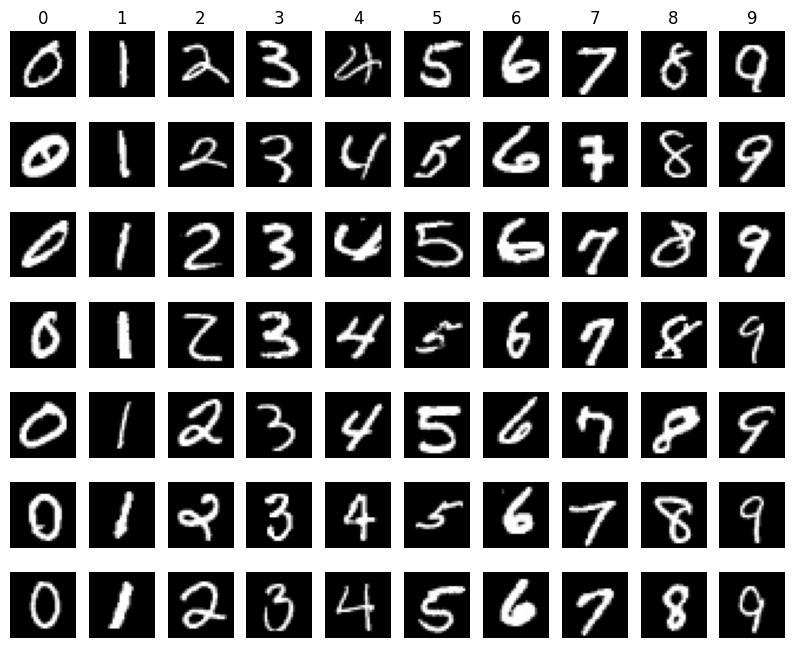

In [345]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Data normalization is an important step which ensures that each input parameter has a similar data distribution. This makes convergence faster while training the network.

In [346]:
X_train, X_val, X_test = get_normalized_MNIST_data(X_train, X_val, X_test)

# ⚒️ Train a Good Model!
Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train the best fully connected model that you can on MNIST, storing your best model in the `MNIST_best_model` variable. We require you to get at least 95% accuracy on the validation set using a fully connected network.

### Explanation

1. **Data Setup**:

   - The `data` dictionary organizes the training, validation, and test sets for use by the solver.

   - Labels (`y_train`, `y_val`, `y_test`) are converted to integers for compatibility with classification functions.

2. **Model Definition**:

   - The `FullyConnectedNet` is defined with the following:

     - **`hidden_dims`**: A list `[256, 128, 64]` defines the number of neurons in three hidden layers.

     - **`input_dim`**: Set to `784` for flattened MNIST images (28x28 pixels).

     - **`output_dim`**: Set to `10` for 10 output classes (digits 0 through 9).

     - **`reg`**: Regularization strength of `0.001` to prevent overfitting.

     - **`weight_scale`**: Standard deviation for weight initialization, set to `1e-2` to ensure small initial weights.

     - **`dtype`**: Using `np.float64` for precision during training.

3. **Solver Definition**:

   - The `Solver` handles training and evaluation of the model. Key parameters:

     - **`update_rule`**: Uses SGD with momentum (`sgd_momentum`) for optimization.

     - **`optim_config`**: Sets the learning rate (`1e-3`).

     - **`lr_decay`**: Reduces the learning rate by multiplying it with `0.95` after each epoch.

     - **`num_epochs`**: Trains the model for 10 epochs.

     - **`batch_size`**: Uses mini-batches of size `200` for efficient training.

     - **`print_every`**: Logs training progress every `100` iterations.

4. **Training**:

   - `solver.train()` trains the model, updating weights and biases to minimize the loss.

   - It evaluates the model on the validation set during training to monitor performance.

### Key Improvements

- **Multiple Hidden Layers**: Improves model expressiveness for MNIST's complexity.

- **Regularization**: Helps mitigate overfitting by adding a penalty for large weights.

- **Learning Rate Decay**: Dynamically reduces the learning rate to fine-tune the model as training progresses.

- **Batch Size**: Balances between training speed and model stability.


In [347]:
MNIST_best_model = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on MNIST. Store your     #
# best model in the best_model variable.                                       #
#                                                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

data = {
    'X_train': X_train.copy(),
    'y_train': y_train.copy().copy().astype(int),
    'X_val': X_val.copy(),
    'y_val': y_val.copy().astype(int),
    'X_test': X_test.copy(),
    'y_test': y_test.copy().astype(int)
    }

model = FullyConnectedNet(
    hidden_dims = [512 ,200, 128, 100, 64],            # five hidden layers
    input_dim = 784,                                   
    output_dim = 10,                                                           
    weight_scale = 1e-1,                               # Standard deviation for weight initialization
    dtype = np.float64,
    category='classification'
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 2e-3,
                },
                lr_decay=0.95,
                num_epochs=15, batch_size=200,
                print_every=100)
solver.train()

MNIST_solver = solver
MNIST_best_model = model

(Iteration 1 / 3750) loss: 2.707746
(Epoch 0 / 15) train acc: 0.111000; val_acc: 0.124000
(Iteration 101 / 3750) loss: 0.850404
(Iteration 201 / 3750) loss: 0.510614
(Epoch 1 / 15) train acc: 0.862000; val_acc: 0.877800
(Iteration 301 / 3750) loss: 0.457883
(Iteration 401 / 3750) loss: 0.220629
(Epoch 2 / 15) train acc: 0.911000; val_acc: 0.913300
(Iteration 501 / 3750) loss: 0.254123
(Iteration 601 / 3750) loss: 0.293559
(Iteration 701 / 3750) loss: 0.264157
(Epoch 3 / 15) train acc: 0.929000; val_acc: 0.923600
(Iteration 801 / 3750) loss: 0.180664
(Iteration 901 / 3750) loss: 0.131286
(Epoch 4 / 15) train acc: 0.952000; val_acc: 0.930500
(Iteration 1001 / 3750) loss: 0.235315
(Iteration 1101 / 3750) loss: 0.246295
(Iteration 1201 / 3750) loss: 0.185520
(Epoch 5 / 15) train acc: 0.944000; val_acc: 0.934100
(Iteration 1301 / 3750) loss: 0.105370
(Iteration 1401 / 3750) loss: 0.100036
(Epoch 6 / 15) train acc: 0.944000; val_acc: 0.939400
(Iteration 1501 / 3750) loss: 0.127422
(Iteration

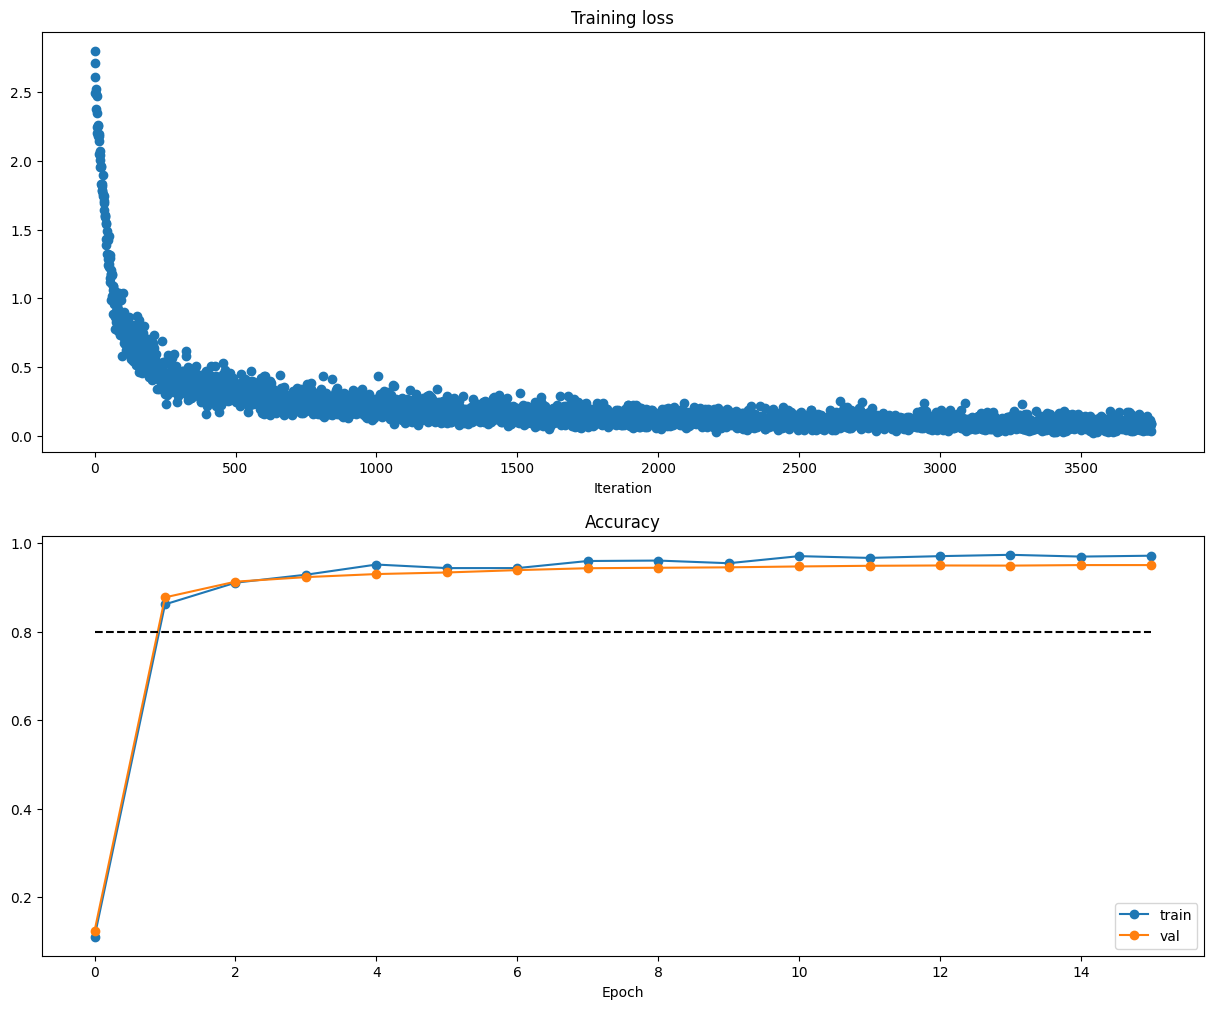

In [348]:
# Run this cell to visualize training loss and train / val accuracy
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(MNIST_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(MNIST_solver.train_acc_history, '-o', label='train')
plt.plot(MNIST_solver.val_acc_history, '-o', label='val')
plt.plot([0.8] * len(MNIST_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# 🧪 Test Your Model!
Run your best model on the validation and test sets. You should achieve at least 95% accuracy on the validation set.

In [349]:
y_test_pred = np.argmax(MNIST_best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(MNIST_best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.9508
Test set accuracy:  0.9492


# 🏙️ California housing dataset
This is a dataset obtained from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [350]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [351]:
X_train, y_train, X_val, y_val, X_test, y_test = get_california_housing_data()
print('Train data shape: ', X_train.shape)
print('Train target values shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation target values shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test target values shape: ', y_test.shape)

Train data shape:  (15640, 8)
Train target values shape:  (15640,)
Validation data shape:  (2500, 8)
Validation target values shape:  (2500,)
Test data shape:  (2500, 8)
Test target values shape:  (2500,)


In [352]:
X_train, X_val, X_test = get_california_housing_normalized__data(X_train, X_val, X_test)

# ⚒️ Train a Good Model!
Train the best fully connected model that you can on california housing, storing your best model in the `california_housing_best_model` variable.

In [ ]:
california_housing_best_model = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on california housing.   #
# Store your best model in the best_model variable.                            #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

data = {
    'X_train': X_train.copy(),
    'y_train': y_train.astype(int),
    'X_val': X_val.copy(),
    'y_val': y_val.astype(int),
    'X_test': X_test.copy(),
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(
    hidden_dims=[256 ,128, 64, 32],      # four hidden layers
    input_dim=8,                         # Number of features in the California housing dataset
    output_dim=1,                       
    reg=1e-2,                            # L2 regularization strength
    weight_scale=1e-1,                   # Standard deviation for weight initialization
    dtype=np.float64,                    
    category='regression'               
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 2e-3,
                },
                lr_decay=0.95,
                num_epochs=10, batch_size=200,
                print_every=100)
solver.train()

california_housing_solver = solver
california_housing_best_model = model

(Iteration 1 / 780) loss: 5.282786
(Epoch 0 / 10) train RMS error: 2.371857; val RMS error: 3.031827
(Epoch 1 / 10) train RMS error: 1.732784; val RMS error: 1.915762
(Iteration 101 / 780) loss: 2.888240
(Epoch 2 / 10) train RMS error: 1.690881; val RMS error: 1.846844
(Iteration 201 / 780) loss: 2.902921
(Epoch 3 / 10) train RMS error: 1.672328; val RMS error: 1.777409
(Iteration 301 / 780) loss: 2.624783
(Epoch 4 / 10) train RMS error: 1.629877; val RMS error: 1.736004
(Epoch 5 / 10) train RMS error: 1.605841; val RMS error: 1.708578
(Iteration 401 / 780) loss: 2.431933
(Epoch 6 / 10) train RMS error: 1.554510; val RMS error: 1.703470
(Iteration 501 / 780) loss: 2.538700
(Epoch 7 / 10) train RMS error: 1.534584; val RMS error: 1.661386
(Iteration 601 / 780) loss: 2.296934
(Epoch 8 / 10) train RMS error: 1.504834; val RMS error: 1.653152
(Iteration 701 / 780) loss: 2.291807
(Epoch 9 / 10) train RMS error: 1.518956; val RMS error: 1.651654
(Epoch 10 / 10) train RMS error: 1.493776; val

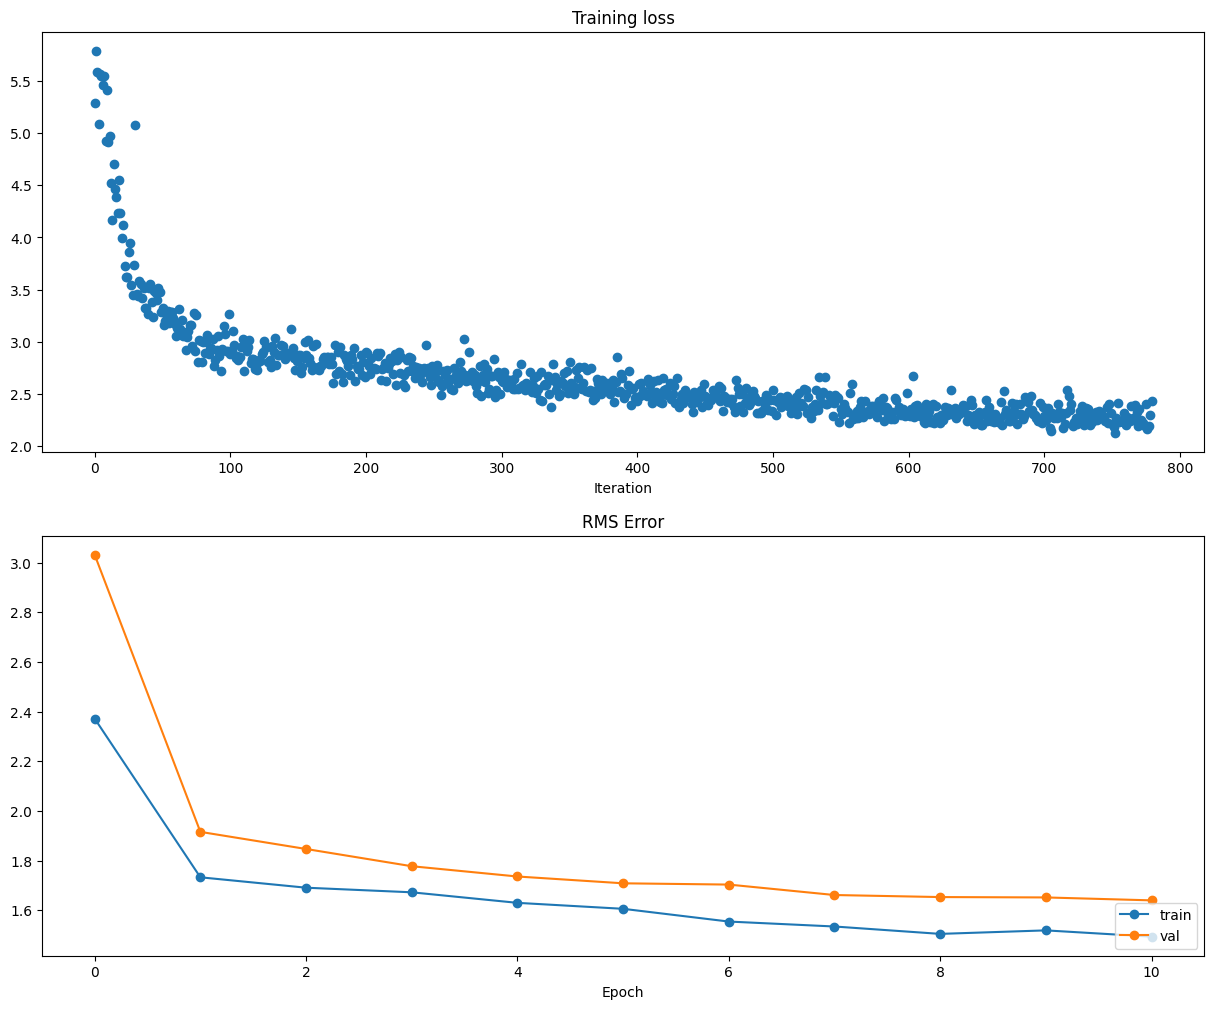

In [354]:
# Run this cell to visualize training loss and train / val RMS error

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(california_housing_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('RMS Error')
plt.plot(california_housing_solver.train_acc_history, '-o', label='train')
plt.plot(california_housing_solver.val_acc_history, '-o', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()